**4.10 Coding Etiquette & Excel Reporting - Task - Part 1**

Content:
- #01 Importing libraries and the recently exported dataset
- #02 Task 6 - Create an appropriate visualization to show the distribution of profiles
- #03 Task 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
- #04 Task 8 - Compare the customer profiles with regions and departments
- #05 Task 9 - Produce suitable charts to illustrate the results and export them 
- #06 Final checks and adjustments


***

#01 Import libraries and dataset

***

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#create path

path=r'C:\Users\EliteMini HX90\OneDrive\Documents\CareerFoundry\Instacart Project Analysis'


In [3]:
#import latest dataset

ords_prods_prof = pd.read_pickle(os.path.join(path,'02_Data','02_Prepared_Data','ords_prods_with_customer_profile.pkl'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\EliteMini HX90\\OneDrive\\Documents\\CareerFoundry\\Instacart Project Analysis\\02_Data\\02_Prepared_Data\\ords_prods_with_customer_profile.pkl'

In [ ]:
#check df shape to compare to the previous notebook
ords_prods_prof.shape

***

#02 **Task 6** - Create a visualisation to show the distribution of profiles

***

In [ ]:
#check columns to have correct names
ords_prods_prof.columns

In [ ]:
#check frequency for each profile
ords_prods_prof['customer_profile'].value_counts()

In [ ]:
#create bar chart
bar_profiles = ords_prods_prof['customer_profile'].value_counts().plot.barh(color=['#4292c6'])

In [ ]:
#save bar chart
bar_profiles.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_customer_profiles.png'),bbox_inches="tight")

***

#03 **Task 7** - Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure

***

In [ ]:
#creating full output of aggregated statistics
ords_prods_prof.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max'],'prices':['mean','min','max']})

In [ ]:
#getting mean values of number of orders
profile_order_mean = ords_prods_prof.groupby('customer_profile')['max_order'].mean()

In [ ]:
profile_order_mean

In [ ]:
#resetting index to sort values for ease of read

profile_order_mean_2= profile_order_mean.reset_index().sort_values(['max_order'],ascending=False).set_index(['customer_profile'])

In [12]:
profile_order_mean_2

,max_order
customer_profile,
Young Adult with High Income and Children,50.469038
Young Adult with Average Income and Children,43.282804
Adult with High Income and Children,42.327141
Adult with Low Income and Children,42.317027
Adult with Average Income and Children,42.253539
Young Adult with Low Income and Children,41.035216
Young Adult with High Income,37.225708
Older Adult with High Income,34.933855
Older Adult with Average Income,34.400510


In [13]:
#getting mean values of order prices
profile_prices_mean = ords_prods_prof.groupby('customer_profile')['prices'].mean()

In [14]:
#resetting index to sort values for ease of read

profile_prices_mean= profile_prices_mean.reset_index().sort_values(['prices'],ascending=False).set_index(['customer_profile'])
profile_prices_mean

,prices
customer_profile,
Adult with High Income,7.973266
Adult with Average Income,7.969456
Young Adult with Average Income,7.964203
Older Adult with Average Income,7.956846
Older Adult with High Income,7.952740
Young Adult with Average Income and Children,7.918461
Adult with Average Income and Children,7.917281
Adult with High Income and Children,7.905879
Young Adult with High Income,7.828315


***

#04 **Task 8** - Compare the customer profiles with regions and departments

***

In [15]:
#creating crosstab to compare each profiles frequency per region, normalized for all data
reg_cust_crosstab = pd.crosstab(ords_prods_prof['customer_profile'],ords_prods_prof['region'],normalize=True,dropna=False)

In [16]:
reg_cust_crosstab

region,Midwest,Northeast,South,West
customer_profile,,,,
Adult with Average Income,0.041242,0.030223,0.057788,0.045083
Adult with Average Income and Children,0.014055,0.010685,0.020314,0.015113
Adult with High Income,0.018935,0.013633,0.025801,0.020340
Adult with High Income and Children,0.009357,0.006779,0.012106,0.009737
Adult with Low Income,0.022411,0.016871,0.032120,0.024434
Adult with Low Income and Children,0.005426,0.004370,0.007825,0.005969
Older Adult with Average Income,0.038688,0.029259,0.055300,0.043235
Older Adult with High Income,0.030658,0.023613,0.043610,0.033240
Older Adult with Low Income,0.009952,0.007979,0.014814,0.011154


The crosstab shows us that the most represented demographic in our data seems to be adults and older adults with an average income level from the South region of the US.

In [17]:
#creating crosstab with aggregated mean of number of orders per customer profile and region
reg_cust_order_crosstab= pd.crosstab(ords_prods_prof['customer_profile'],ords_prods_prof['region'],values=ords_prods_prof['max_order'],aggfunc='mean',dropna=False)

In [18]:
reg_cust_order_crosstab

region,Midwest,Northeast,South,West
customer_profile,,,,
Adult with Average Income,31.769557,31.682734,31.948309,33.595269
Adult with Average Income and Children,41.935671,43.330854,42.040502,42.073798
Adult with High Income,30.206483,29.219069,30.141415,30.858334
Adult with High Income and Children,43.424682,42.457828,41.251501,42.518887
Adult with Low Income,31.559891,31.908579,32.498956,32.420512
Adult with Low Income and Children,42.763656,43.690225,42.561135,40.585615
Older Adult with Average Income,33.996517,34.375245,34.095077,35.169781
Older Adult with High Income,34.174270,35.242476,35.474411,34.706020
Older Adult with Low Income,30.853264,33.252576,33.497831,31.948896


The average number of orders per user seems to be relatively comparable across regions for each customer profile. The one value that stands out from the rest corresponds to young adults with high income and children in the South region of the US, which seems to almost double the average number of orders by the same customer profile in the remaining regions.

In [19]:
#creating crosstab with aggregated mean of order prices per customer profile and region
reg_cust_prices_crosstab= pd.crosstab(ords_prods_prof['customer_profile'],ords_prods_prof['region'],values=ords_prods_prof['prices'],aggfunc='mean',dropna=False)

In [20]:
reg_cust_prices_crosstab

region,Midwest,Northeast,South,West
customer_profile,,,,
Adult with Average Income,7.971251,7.969180,7.977787,7.957321
Adult with Average Income and Children,7.907927,7.908126,7.913023,7.938174
Adult with High Income,7.971313,7.961257,7.993035,7.958061
Adult with High Income and Children,7.899787,7.882427,7.915987,7.915497
Adult with Low Income,7.240730,7.229402,7.259554,7.261166
Adult with Low Income and Children,7.517287,7.590641,7.548994,7.522306
Older Adult with Average Income,7.950678,7.946377,7.968213,7.954912
Older Adult with High Income,7.934993,7.972082,7.952530,7.955642
Older Adult with Low Income,6.711772,6.739144,6.698564,6.717514


Also when it comes to product prices it seems easier to observe differences depending on the customer profile than their region, with older adults with a lower income spending the least amount per item regardless of their region.

In [21]:
#import departments dataset to act as data dictionary
df_deps = pd.read_csv(os.path.join(path,'02_Data','02_Prepared_Data','departments_wrangled.csv'),index_col=False)

In [22]:
#setting the index to start at 1 and not 0
df_deps.index = np.arange(1, len(df_deps)+1)


In [23]:
#creating data dictionary
data_dict = df_deps.to_dict('index')
data_dict

{1: {'department': 'frozen'},
 2: {'department': 'other'},
 3: {'department': 'bakery'},
 4: {'department': 'produce'},
 5: {'department': 'alcohol'},
 6: {'department': 'international'},
 7: {'department': 'beverages'},
 8: {'department': 'pets'},
 9: {'department': 'dry goods pasta'},
 10: {'department': 'bulk'},
 11: {'department': 'personal care'},
 12: {'department': 'meat seafood'},
 13: {'department': 'pantry'},
 14: {'department': 'breakfast'},
 15: {'department': 'canned goods'},
 16: {'department': 'dairy eggs'},
 17: {'department': 'household'},
 18: {'department': 'babies'},
 19: {'department': 'snacks'},
 20: {'department': 'deli'},
 21: {'department': 'missing'}}

In [24]:
#creating crosstab to compare each profiles frequency per department_id, normalized by row (department)
dep_cust_crosstab_1 = pd.crosstab(ords_prods_prof['department_id'],ords_prods_prof['customer_profile'],normalize='index',dropna=False)

In [25]:
dep_cust_crosstab_1

customer_profile,Adult with Average Income,Adult with Average Income and Children,Adult with High Income,Adult with High Income and Children,Adult with Low Income,Adult with Low Income and Children,Older Adult with Average Income,Older Adult with High Income,Older Adult with Low Income,Young Adult with Average Income,Young Adult with Average Income and Children,Young Adult with High Income,Young Adult with High Income and Children,Young Adult with Low Income,Young Adult with Low Income and Children
department_id,,,,,,,,,,,,,,,
1,0.176803,0.059887,0.079949,0.038509,0.088884,0.024713,0.168439,0.133949,0.041181,0.073918,0.025073,0.001873,0.000740,0.066057,0.020024
2,0.171573,0.060795,0.073291,0.041760,0.090785,0.025341,0.161373,0.132661,0.043184,0.080294,0.023684,0.004417,0.001017,0.066142,0.023684
3,0.175827,0.061781,0.080578,0.039854,0.089702,0.023360,0.167495,0.135741,0.037982,0.073903,0.025622,0.002223,0.000719,0.065610,0.019602
4,0.181161,0.059411,0.080692,0.036858,0.090777,0.022033,0.171276,0.133167,0.037447,0.077445,0.024503,0.001089,0.000377,0.066251,0.017512
5,0.193408,0.024857,0.111300,0.027381,0.113132,0.007654,0.148797,0.130785,0.049514,0.085344,0.010441,0.011741,0.001328,0.077835,0.006486
6,0.188397,0.055768,0.084546,0.035228,0.084882,0.022731,0.171229,0.133157,0.033314,0.080811,0.023048,0.001863,0.000453,0.067166,0.017407
7,0.174878,0.047746,0.081383,0.030259,0.116659,0.019769,0.156448,0.126504,0.060634,0.072960,0.018519,0.001857,0.000493,0.076105,0.015787
8,0.188717,0.045508,0.090877,0.034204,0.085783,0.018504,0.166054,0.138814,0.036364,0.084440,0.013507,0.003514,0.000634,0.070707,0.022373
9,0.176187,0.068125,0.078958,0.042728,0.078393,0.025296,0.174161,0.134884,0.031655,0.074989,0.028629,0.001851,0.000566,0.062091,0.021487


Adults and older adults with an average income seem to be the ones making the most orders in most departments.

In [26]:
#creating crosstab to compare each profiles frequency per department_id, normalized by column (profile)
dep_cust_crosstab_2 = pd.crosstab(ords_prods_prof['department_id'],ords_prods_prof['customer_profile'],normalize='columns',dropna=False)

In [27]:
dep_cust_crosstab_2

customer_profile,Adult with Average Income,Adult with Average Income and Children,Adult with High Income,Adult with High Income and Children,Adult with Low Income,Adult with Low Income and Children,Older Adult with Average Income,Older Adult with High Income,Older Adult with Low Income,Young Adult with Average Income,Young Adult with Average Income and Children,Young Adult with High Income,Young Adult with High Income and Children,Young Adult with Low Income,Young Adult with Low Income and Children
department_id,,,,,,,,,,,,,,,
1,0.069491,0.068203,0.069601,0.069478,0.063551,0.071782,0.069327,0.069999,0.064278,0.068338,0.069002,0.077538,0.093843,0.066854,0.072346
2,0.001094,0.001123,0.001035,0.001222,0.001053,0.001194,0.001077,0.001124,0.001093,0.001204,0.001057,0.002966,0.002092,0.001086,0.001388
3,0.036507,0.037168,0.037057,0.037985,0.033880,0.035842,0.036417,0.037473,0.031317,0.036093,0.037249,0.048622,0.048177,0.035078,0.037413
4,0.304692,0.289530,0.300603,0.284567,0.277738,0.273861,0.301658,0.297790,0.250118,0.306387,0.288559,0.192968,0.204423,0.286922,0.270734
5,0.005182,0.001930,0.006605,0.003367,0.005514,0.001515,0.004175,0.004659,0.005268,0.005378,0.001959,0.033130,0.011476,0.005370,0.001597
6,0.008934,0.007663,0.008880,0.007668,0.007322,0.007966,0.008503,0.008396,0.006274,0.009014,0.007653,0.009307,0.006934,0.008202,0.007588
7,0.083317,0.065912,0.085882,0.066176,0.101107,0.069603,0.078053,0.080135,0.114720,0.081764,0.061777,0.093206,0.075852,0.093365,0.069138
8,0.003253,0.002273,0.003470,0.002707,0.002690,0.002357,0.002998,0.003182,0.002489,0.003424,0.001630,0.006380,0.003527,0.003139,0.003545
9,0.026833,0.030063,0.026635,0.029871,0.021719,0.028471,0.027775,0.027313,0.019145,0.026864,0.030529,0.029696,0.027794,0.024349,0.030080


All customer profiles buy the largest amount of items from the produce department. On the other hand, it seems like most customer profiles seldom make purchases from the bulk department.

In [28]:
#creating crosstab with aggregated mean of order prices per customer profile and department
dep_cust_prices_crosstab= pd.crosstab(ords_prods_prof['department_id'],ords_prods_prof['customer_profile'],values=ords_prods_prof['prices'],aggfunc='mean',dropna=False)

In [29]:
dep_cust_prices_crosstab

customer_profile,Adult with Average Income,Adult with Average Income and Children,Adult with High Income,Adult with High Income and Children,Adult with Low Income,Adult with Low Income and Children,Older Adult with Average Income,Older Adult with High Income,Older Adult with Low Income,Young Adult with Average Income,Young Adult with Average Income and Children,Young Adult with High Income,Young Adult with High Income and Children,Young Adult with Low Income,Young Adult with Low Income and Children
department_id,,,,,,,,,,,,,,,
1,7.881064,7.750055,7.887879,7.720601,7.450930,7.452497,7.816786,7.811418,7.028034,7.836300,7.760809,7.707398,8.007834,7.623117,7.573636
2,7.158841,7.057122,7.435052,7.683229,6.499552,6.635092,6.761678,7.246002,6.215410,6.822222,6.800613,8.721711,8.928571,6.648286,6.912638
3,7.954464,7.968186,7.907422,7.845507,7.486264,7.720327,7.999298,7.947010,7.109344,7.979232,7.991176,7.467376,7.036104,7.746154,7.751022
4,8.107464,8.005383,8.124193,8.001263,7.631508,7.738586,8.073836,8.084962,7.196109,8.105344,7.995258,8.110597,8.115936,7.845931,7.877039
5,8.325930,8.072045,8.395974,8.292374,7.653080,7.663234,8.429833,8.241602,7.040399,8.284874,8.448874,8.704417,8.083854,7.892600,7.777292
6,7.815313,7.609919,7.792580,7.580428,7.446454,7.479412,7.760308,7.755030,7.162500,7.763537,7.692322,7.807547,8.002586,7.453437,7.500898
7,7.905769,7.788686,7.919141,7.831090,7.162347,7.430942,7.886171,7.911156,6.711347,7.925980,7.713179,7.833075,7.256422,7.430242,7.475457
8,7.841670,7.766092,8.115076,8.045586,7.553113,7.809582,7.984521,7.947368,7.192435,8.217269,7.642323,8.383486,5.391525,7.833146,7.807205
9,7.440797,7.368238,7.462359,7.342425,7.133294,7.188022,7.398146,7.389938,6.853648,7.381248,7.369822,7.364060,6.519785,7.278012,7.285321


Across all profiles, the meat and seafood department is the one where customers spend, on average, the largest sum per item. The oppositte can be said for the snacks department, again, for every profile. Interestingly, adults with low income and children seem to spend the most amount of any profile on bulk items, while young adults with high income spend the most per item on the deli department compared to other demographics.

***

#05 **Task 9** Produce suitable charts to illustrate your results

***

In [123]:
#check statistical info for prices variable
ords_prods_prof['prices'].describe()

count    3.095969e+07
mean     7.790590e+00
std      4.240595e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


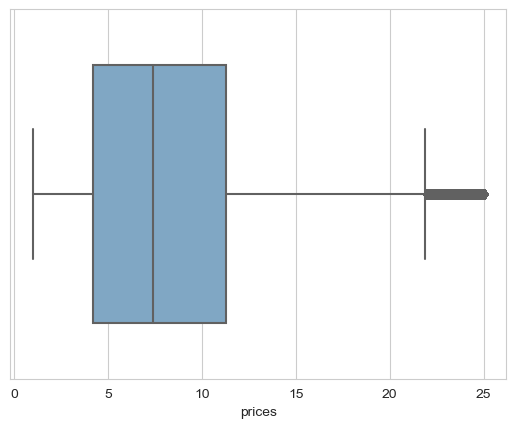

In [131]:
#create boxplot for of prices values
sns.set_style("whitegrid")
box_prices = sns.boxplot(data=ords_prods_prof,x="prices",width=0.7,palette='PuBu_r')

In [152]:
#save boxplot
box_prices.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'boxplot_prices'))

In [141]:
#aggregating user_id grouped by loyalty
loyalty_fq = ords_prods_prof.groupby('loyalty_flag')['user_id'].count()
loyalty_fq

loyalty_flag
Loyal customer      10284093
New customer         4803695
Regular customer    15876776
Name: user_id, dtype: int64

In [145]:
#resetting index to sort values for ease of read

loyalty_fq= loyalty_fq.reset_index().sort_values(['user_id'],ascending=False).set_index(['loyalty_flag'])
loyalty_fq

,user_id
loyalty_flag,
Regular customer,15876776
Loyal customer,10284093
New customer,4803695


In [183]:
#checking normalized values
loyalty_perc = loyalty_fq['user_id']/loyalty_fq['user_id'].sum()

In [182]:
loyalty_perc

loyalty_flag
Regular customer    0.512740
Loyal customer      0.332125
New customer        0.155135
Name: user_id, dtype: float64

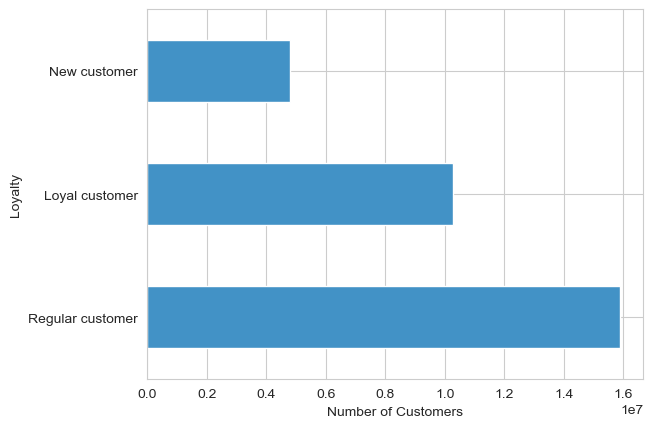

In [150]:
#create bar chart of number of customers per loyalty flag
bar_loyalty = loyalty_fq['user_id'].plot.barh(color=['#4292c6'], xlabel='Number of Customers', ylabel='Loyalty')

In [153]:
#save chart
bar_loyalty.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'chart_loyalty'),bbox_inches="tight")

In [30]:
#create list for sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_prof)) <= 0.7

In [31]:
#store 70% of sample in df big
big=ords_prods_prof[dev]

In [32]:
#store 30% of the sample in the df small
small=ords_prods_prof[~dev]

In [33]:
#check length of full dataset
len(ords_prods_prof)

30964564

In [34]:
#check length of two sample dfs to see if it matches
len(big) + len(small)

30964564

In [35]:
#check statistical info for full dataset
ords_prods_prof.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,avg_price,median_days_since_order,age,n_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,2.559850e+04,7.118859e+01,9.922365e+00,7.790590e+00,1.710317e+06,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,8.363038e+00,6.061019e-01,3.442569e+01,1.193352e+01,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,1.408096e+04,3.822194e+01,6.282441e+00,4.240595e+00,9.873785e+05,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,7.135399e+00,4.886127e-01,2.489504e+01,7.992284e+01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.554120e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,2.528800e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710404e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565206e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.800000e+01,8.249596e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [36]:
#check statistical info for sample df to check if it seems to be an accurate sample
small.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,avg_price,median_days_since_order,age,n_dependants,income
count,9.288468e+06,9.288468e+06,9.288468e+06,9.287032e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,8.790387e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06
mean,2.559287e+04,7.120850e+01,9.920261e+00,7.791713e+00,1.710281e+06,1.783281e+01,2.741068e+00,1.341033e+01,1.081042e+01,8.363651e+00,6.059407e-01,3.442410e+01,1.197246e+01,9.958153e+00,4.947181e+01,1.501984e+00,9.967934e+04
std,1.407919e+04,3.821437e+01,6.282186e+00,4.239093e+00,9.874358e+05,1.763939e+01,2.088980e+00,4.247800e+00,8.578086e+00,7.136231e+00,4.886477e-01,2.489654e+01,8.131311e+01,6.666217e+00,1.848688e+01,1.118733e+00,4.313687e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.354100e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.552510e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.400000e+01,7.392388e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.732100e+04
50%,2.527200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710344e+06,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.800000e+01,7.825069e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.677500e+04
75%,3.793500e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565380e+06,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,4.800000e+01,8.249412e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281050e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,2.500000e+01,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.410000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [37]:
# create a crosstab table of region and customer_profile with row and column margins
ct_margins = pd.crosstab(small['customer_profile'], small['region'], margins=True)
ct_margins

region,Midwest,Northeast,South,West,All
customer_profile,,,,,
Adult with Average Income,383221,280199,536884,418522,1618826
Adult with Average Income and Children,130634,99271,189450,139831,559186
Adult with High Income,175685,126530,240316,188729,731260
Adult with High Income and Children,86503,62980,112767,90437,352687
Adult with Low Income,208206,156513,298717,227240,890676
Adult with Low Income and Children,50182,40592,72362,55134,218270
Older Adult with Average Income,360295,271924,513698,401281,1547198
Older Adult with High Income,284698,218794,405944,308517,1217953
Older Adult with Low Income,92757,73808,137900,103072,407537


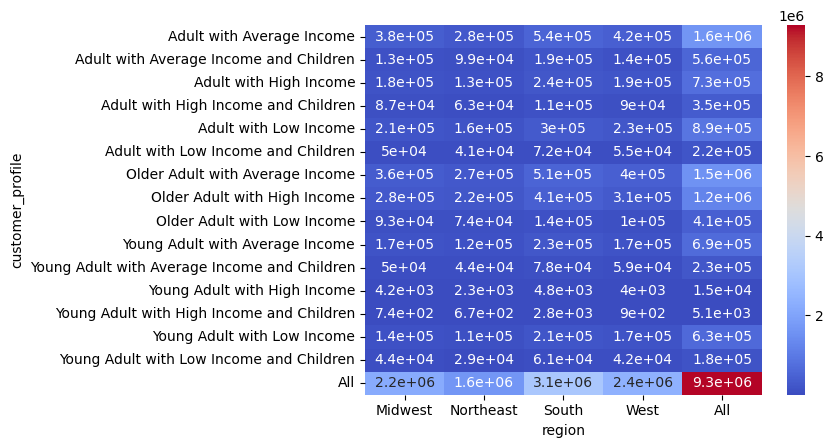

In [38]:
#create heatmap based on crosstab table
ct_heatmap= sns.heatmap(ct_margins, cmap='coolwarm', annot=True)

In [39]:
#save heatmap
ct_heatmap.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'heatmap_profile_region.png'))

In [40]:
#reprint earlier output from task 7 for ease of access
profile_prices_mean

,prices
customer_profile,
Adult with High Income,7.973266
Adult with Average Income,7.969456
Young Adult with Average Income,7.964203
Older Adult with Average Income,7.956846
Older Adult with High Income,7.952740
Young Adult with Average Income and Children,7.918461
Adult with Average Income and Children,7.917281
Adult with High Income and Children,7.905879
Young Adult with High Income,7.828315


In [41]:
#reprint earlier output from task 7 for easier access
profile_order_mean

,max_order
customer_profile,
Young Adult with High Income and Children,50.469038
Young Adult with Average Income and Children,43.282804
Adult with High Income and Children,42.327141
Adult with Low Income and Children,42.317027
Adult with Average Income and Children,42.253539
Young Adult with Low Income and Children,41.035216
Young Adult with High Income,37.225708
Older Adult with High Income,34.933855
Older Adult with Average Income,34.400510


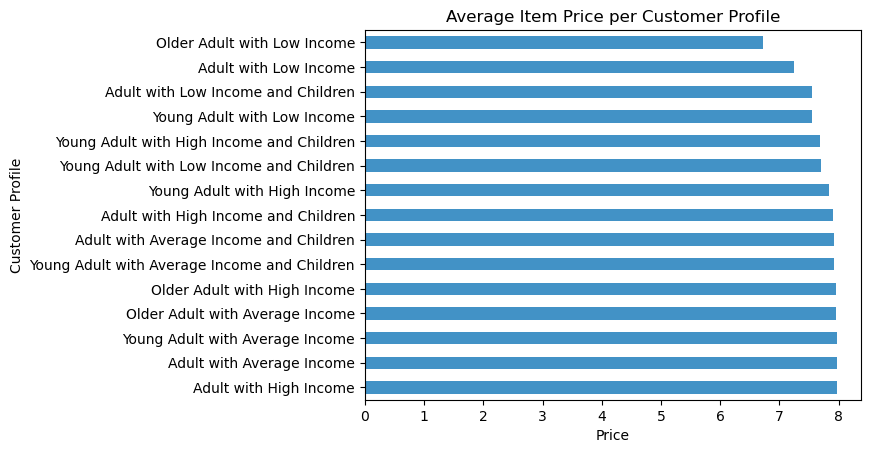

In [42]:
#create bar chart of average item price
bar_cust_price = profile_prices_mean['prices'].plot.barh(color=['#4292c6'],  title='Average Item Price per Customer Profile', xlabel='Price', ylabel='Customer Profile')

In [161]:
#save bar chart
bar_cust_price.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_customer_profiles_avg_price.png'),bbox_inches="tight")

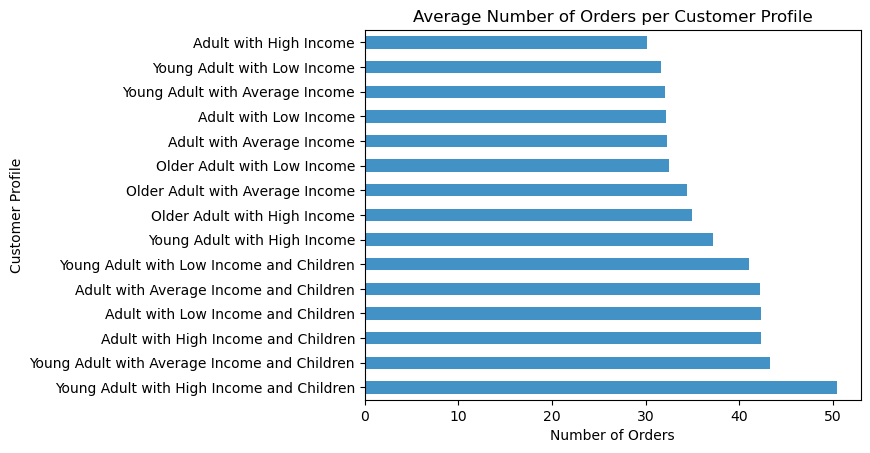

In [44]:
#create bar chart of average number of orders
bar_cust_order = profile_order_mean['max_order'].plot.barh(color=['#4292c6'],  title='Average Number of Orders per Customer Profile', xlabel='Number of Orders', ylabel='Customer Profile')

In [160]:
#save bar chart
bar_cust_order.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_customer_profiles_avg_orders.png'),bbox_inches="tight")

In [46]:
ords_prods_prof.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_since_order', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'region', 'age_group', 'income_group', 'dependant_group',
       'children_flag', 'customer_profile'],
      dtype='object')

In [47]:
#creating subset with only potentially relevant columns for analysis of departments
df_depinfo = ords_prods_prof[['department_id','user_id','prices','order_number', 'max_order','avg_price','loyalty_flag','spending_flag','region','customer_profile']]

In [48]:
df_deps.columns

Index(['department'], dtype='object')

In [49]:
#convert df_deps index into column for merging key
df_deps['department_id']=df_deps.index

In [50]:
#check df
df_deps

,department,department_id
1,frozen,1
2,other,2
3,bakery,3
4,produce,4
5,alcohol,5
6,international,6
7,beverages,7
8,pets,8
9,dry goods pasta,9
10,bulk,10


In [51]:
#merge dataframes
df_depanalysis = df_depinfo.merge(df_deps, on = 'department_id')

In [52]:
df_depanalysis.head()

,department_id,user_id,prices,order_number,max_order,avg_price,loyalty_flag,spending_flag,region,customer_profile,department
0,19,138,5.8,28,32,6.935811,Regular customer,Low Spender,Midwest,Older Adult with Low Income,snacks
1,19,138,5.8,30,32,6.935811,Regular customer,Low Spender,Midwest,Older Adult with Low Income,snacks
2,19,138,4.4,23,32,6.935811,Regular customer,Low Spender,Midwest,Older Adult with Low Income,snacks
3,19,138,4.4,7,32,6.935811,Regular customer,Low Spender,Midwest,Older Adult with Low Income,snacks
4,19,138,4.2,28,32,6.935811,Regular customer,Low Spender,Midwest,Older Adult with Low Income,snacks


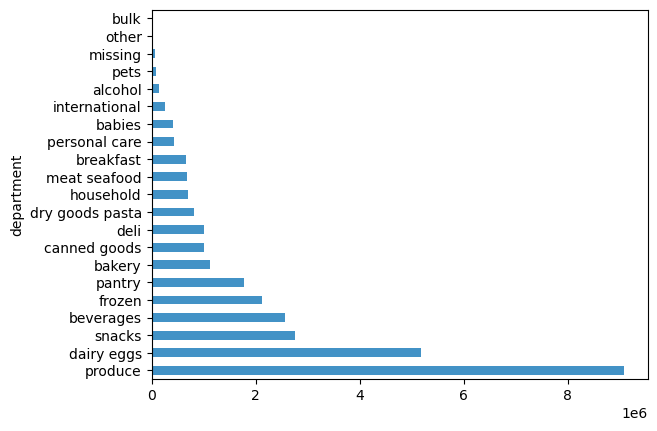

In [53]:
#create bar chart
bar_departments = df_depanalysis['department'].value_counts().plot.barh(color=['#4292c6'])

In [133]:
#save bar chart
bar_departments.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_departments.png'),bbox_inches='tight')

C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\EliteMini HX90\AppData\Local\Temp\ipykernel_15168\483165900.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line_avg_price_department = sns.lineplot(data = df_depanalysis, x = 'department',y = 'avg_price', palette='PuBu_r')
C:\Users\EliteMini HX90\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

[Text(0, 0, 'snacks'),
 Text(1, 0, 'meat seafood'),
 Text(2, 0, 'bulk'),
 Text(3, 0, 'produce'),
 Text(4, 0, 'breakfast'),
 Text(5, 0, 'pantry'),
 Text(6, 0, 'dairy eggs'),
 Text(7, 0, 'frozen'),
 Text(8, 0, 'beverages'),
 Text(9, 0, 'deli'),
 Text(10, 0, 'household'),
 Text(11, 0, 'personal care'),
 Text(12, 0, 'canned goods'),
 Text(13, 0, 'bakery'),
 Text(14, 0, 'missing'),
 Text(15, 0, 'international'),
 Text(16, 0, 'dry goods pasta'),
 Text(17, 0, 'pets'),
 Text(18, 0, 'alcohol'),
 Text(19, 0, 'other'),
 Text(20, 0, 'babies')]

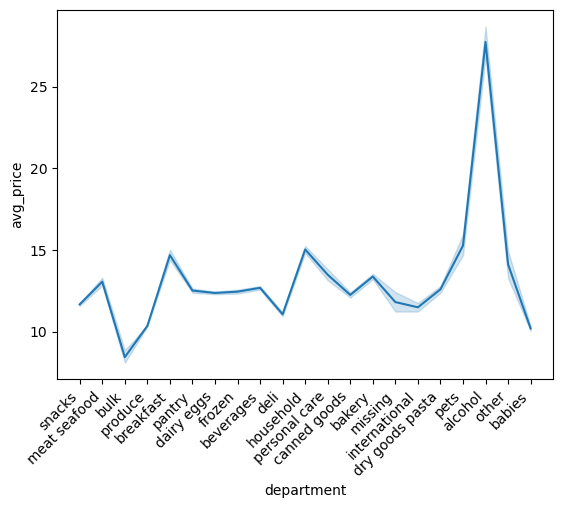

In [55]:
#plot line chart 
line_avg_price_department = sns.lineplot(data = df_depanalysis, x = 'department',y = 'avg_price', palette='PuBu_r')
line_avg_price_department.set_xticklabels(line_avg_price_department.get_xticklabels(), rotation=45,horizontalalignment='right')

In [56]:
#save line chart
line_avg_price_department.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'line_price_departments.png'))

In [57]:
#creating crosstab to compare each loyalty_flag frequency per department_id, normalized by row (department)
dep_loy_1 = pd.crosstab(df_depanalysis['department'],df_depanalysis['loyalty_flag'],normalize='index',dropna=False)

In [61]:
dep_loy_1

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,0.267744,0.197951,0.534305
babies,0.407191,0.113813,0.478996
bakery,0.338922,0.153551,0.507527
beverages,0.332446,0.154224,0.513330
breakfast,0.330293,0.158275,0.511432
bulk,0.413560,0.124032,0.462408
canned goods,0.291080,0.178046,0.530874
dairy eggs,0.353611,0.144877,0.501512
deli,0.322808,0.157730,0.519461


[Text(0, 0, 'alcohol'),
 Text(1, 0, 'babies'),
 Text(2, 0, 'bakery'),
 Text(3, 0, 'beverages'),
 Text(4, 0, 'breakfast'),
 Text(5, 0, 'bulk'),
 Text(6, 0, 'canned goods'),
 Text(7, 0, 'dairy eggs'),
 Text(8, 0, 'deli'),
 Text(9, 0, 'dry goods pasta'),
 Text(10, 0, 'frozen'),
 Text(11, 0, 'household'),
 Text(12, 0, 'international'),
 Text(13, 0, 'meat seafood'),
 Text(14, 0, 'missing'),
 Text(15, 0, 'other'),
 Text(16, 0, 'pantry'),
 Text(17, 0, 'personal care'),
 Text(18, 0, 'pets'),
 Text(19, 0, 'produce'),
 Text(20, 0, 'snacks')]

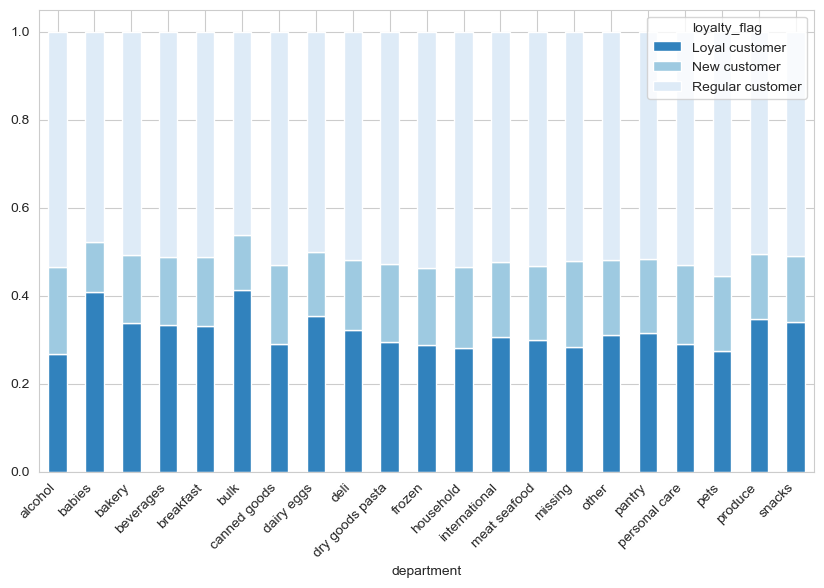

In [156]:
#create stacked bar chart of distribution of each loyalty flag by department
bar_deploy=dep_loy_1.plot.bar(stacked=True,color=['#3182bd','#9ecae1','#deebf7'],figsize=(10,6))
bar_deploy.set_xticklabels(bar_deploy.get_xticklabels(),rotation=45,horizontalalignment='right')

In [157]:
#save chart
bar_deploy.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_department_loyalty.png'),bbox_inches="tight")

In [81]:
#creating crosstab to compare each region frequency per department_id, normalized by row (department)
dep_reg_1 = pd.crosstab(df_depanalysis['department'],df_depanalysis['region'],normalize='index',dropna=False)

In [82]:
dep_reg_1

region,Midwest,Northeast,South,West
department,,,,
alcohol,0.235385,0.172976,0.337510,0.254130
babies,0.233292,0.177177,0.339946,0.249586
bakery,0.233535,0.177815,0.331558,0.257091
beverages,0.232893,0.179995,0.334157,0.252955
breakfast,0.232772,0.175753,0.332670,0.258805
bulk,0.237033,0.167379,0.334220,0.261367
canned goods,0.234626,0.174825,0.333432,0.257117
dairy eggs,0.234199,0.176663,0.332810,0.256329
deli,0.233568,0.177717,0.332346,0.256369


[Text(0, 0, 'alcohol'),
 Text(1, 0, 'babies'),
 Text(2, 0, 'bakery'),
 Text(3, 0, 'beverages'),
 Text(4, 0, 'breakfast'),
 Text(5, 0, 'bulk'),
 Text(6, 0, 'canned goods'),
 Text(7, 0, 'dairy eggs'),
 Text(8, 0, 'deli'),
 Text(9, 0, 'dry goods pasta'),
 Text(10, 0, 'frozen'),
 Text(11, 0, 'household'),
 Text(12, 0, 'international'),
 Text(13, 0, 'meat seafood'),
 Text(14, 0, 'missing'),
 Text(15, 0, 'other'),
 Text(16, 0, 'pantry'),
 Text(17, 0, 'personal care'),
 Text(18, 0, 'pets'),
 Text(19, 0, 'produce'),
 Text(20, 0, 'snacks')]

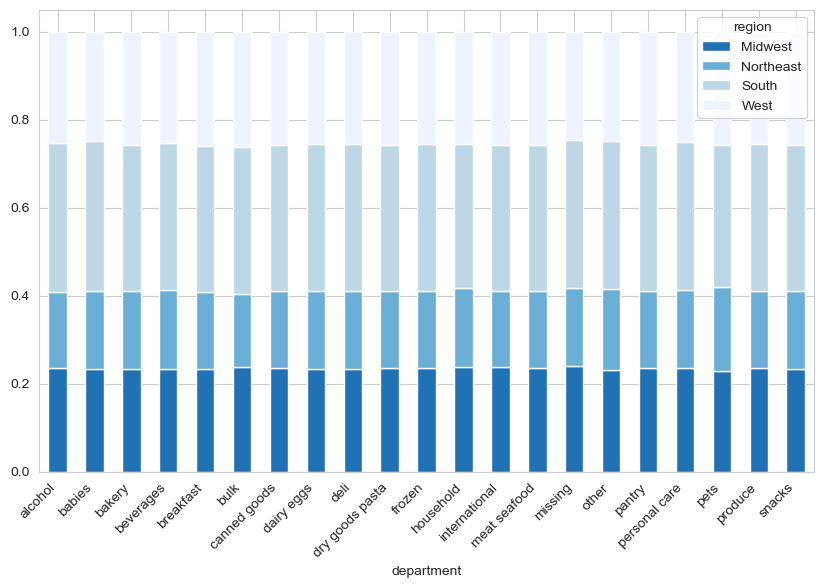

In [158]:
#create stacked bar chart of distribution of each region by department
bar_depreg =dep_reg_1.plot.bar(stacked=True,color=['#2171b5','#6baed6','#bdd7e7','#eff3ff'],figsize=(10,6))
bar_depreg.set_xticklabels(bar_deploy.get_xticklabels(),rotation=45,horizontalalignment='right')

In [159]:
#save chart
bar_depreg.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_department_region.png'),bbox_inches="tight")

In [100]:
#creating subset with only potentially relevant columns for closer analysis of profiles vs departments
df_dep_prof = ords_prods_prof[['department_id','user_id','prices','order_number', 'max_order','avg_price', 'age_group', 'income_group', 'dependent_group','children_flag','customer_profile']]

In [101]:
df_dep_prof.head()

,department_id,user_id,prices,order_number,max_order,avg_price,age_group,income_group,dependent_group,children_flag,customer_profile
0,19,138,5.8,28,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income
1,19,138,5.8,30,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income
2,12,138,20.0,1,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income
3,12,138,20.0,10,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income
4,10,138,12.9,9,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income


In [102]:
#merge dataframes
df_profanalysis = df_dep_prof.merge(df_deps, on = 'department_id')

In [107]:
df_profanalysis.head()

,department_id,user_id,prices,order_number,max_order,avg_price,age_group,income_group,dependent_group,children_flag,customer_profile,department
0,19,138,5.8,28,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,snacks
1,19,138,5.8,30,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,snacks
2,19,138,4.4,23,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,snacks
3,19,138,4.4,7,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,snacks
4,19,138,4.2,28,32,6.935811,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,snacks


In [105]:
#creating crosstab to compare age_group per department, normalized by row (department)
dep_cust_crosstab_3 = pd.crosstab(df_profanalysis['department'],df_profanalysis['age_group'],normalize='index',dropna=False)

In [106]:
dep_cust_crosstab_3

age_group,Adult,Older Adult,Young Adult
department,,,
alcohol,0.477732,0.329095,0.193173
babies,0.472465,0.338062,0.189473
bakery,0.471102,0.341217,0.187681
beverages,0.470693,0.343586,0.185721
breakfast,0.469530,0.339496,0.190974
bulk,0.466742,0.341514,0.191743
canned goods,0.469785,0.340338,0.189877
dairy eggs,0.470988,0.340438,0.188573
deli,0.470163,0.342024,0.187813


[Text(0, 0, 'alcohol'),
 Text(1, 0, 'babies'),
 Text(2, 0, 'bakery'),
 Text(3, 0, 'beverages'),
 Text(4, 0, 'breakfast'),
 Text(5, 0, 'bulk'),
 Text(6, 0, 'canned goods'),
 Text(7, 0, 'dairy eggs'),
 Text(8, 0, 'deli'),
 Text(9, 0, 'dry goods pasta'),
 Text(10, 0, 'frozen'),
 Text(11, 0, 'household'),
 Text(12, 0, 'international'),
 Text(13, 0, 'meat seafood'),
 Text(14, 0, 'missing'),
 Text(15, 0, 'other'),
 Text(16, 0, 'pantry'),
 Text(17, 0, 'personal care'),
 Text(18, 0, 'pets'),
 Text(19, 0, 'produce'),
 Text(20, 0, 'snacks')]

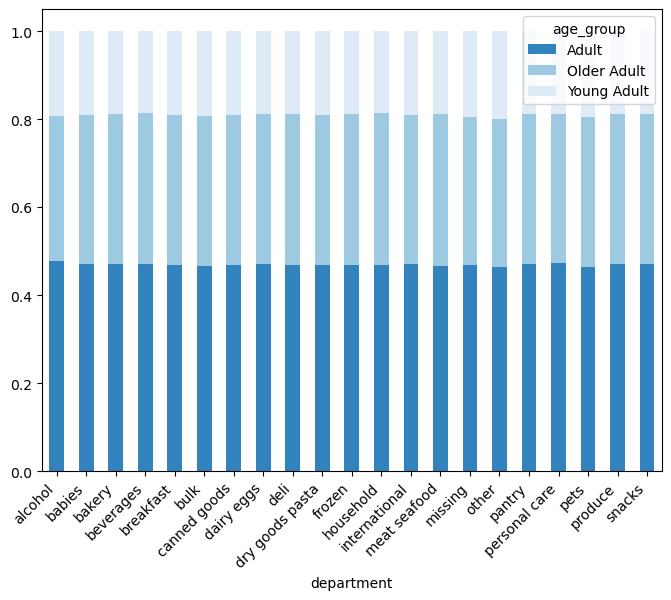

In [115]:
#plot stacked bar chart of relative orders per department based on age_group
bar_depcust_3 =dep_cust_crosstab_3.plot.bar(stacked=True,color=['#3182bd','#9ecae1','#deebf7'], figsize=(8,6))
bar_depcust_3.set_xticklabels(bar_deploy.get_xticklabels(),rotation=45,horizontalalignment='right')

In [163]:
#save chart
bar_depcust_3.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_department_age_group.png'),bbox_inches="tight")

In [111]:
#creating crosstab to compare income group per department, normalized by row (department)
dep_cust_crosstab_4 = pd.crosstab(df_profanalysis['department'],df_profanalysis['income_group'],normalize='index',dropna=False)

In [187]:
dep_cust_crosstab_4

income_group,Average Income,High Income,Low Income
department,,,
alcohol,0.462846,0.282534,0.254621
babies,0.538224,0.257495,0.204280
bakery,0.504629,0.259116,0.236256
beverages,0.470550,0.240496,0.288953
breakfast,0.477634,0.242808,0.279557
bulk,0.493558,0.225434,0.281008
canned goods,0.517498,0.262692,0.219810
dairy eggs,0.508759,0.253813,0.237428
deli,0.502745,0.250059,0.247195


[Text(0, 0, 'alcohol'),
 Text(1, 0, 'babies'),
 Text(2, 0, 'bakery'),
 Text(3, 0, 'beverages'),
 Text(4, 0, 'breakfast'),
 Text(5, 0, 'bulk'),
 Text(6, 0, 'canned goods'),
 Text(7, 0, 'dairy eggs'),
 Text(8, 0, 'deli'),
 Text(9, 0, 'dry goods pasta'),
 Text(10, 0, 'frozen'),
 Text(11, 0, 'household'),
 Text(12, 0, 'international'),
 Text(13, 0, 'meat seafood'),
 Text(14, 0, 'missing'),
 Text(15, 0, 'other'),
 Text(16, 0, 'pantry'),
 Text(17, 0, 'personal care'),
 Text(18, 0, 'pets'),
 Text(19, 0, 'produce'),
 Text(20, 0, 'snacks')]

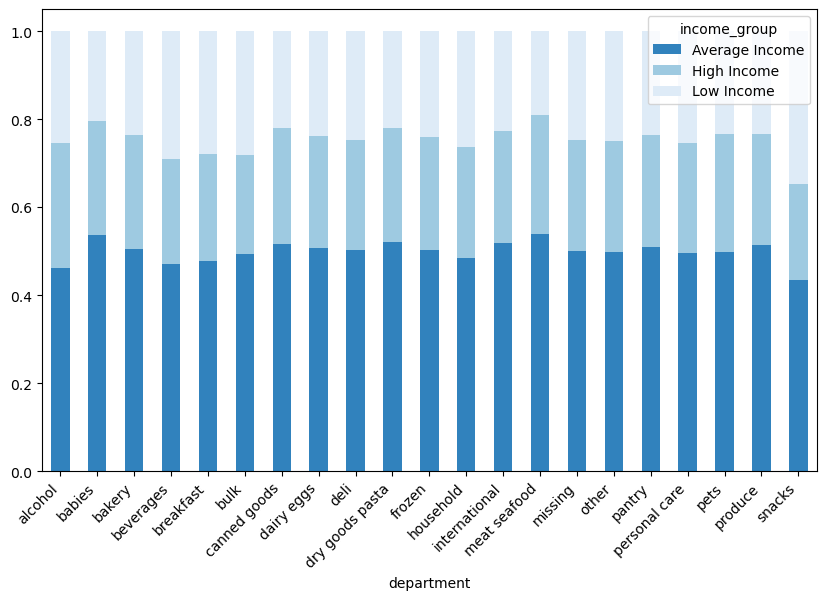

In [117]:
#plot stacked bar chart of relative orders per department based on income_group
bar_depcust_4 =dep_cust_crosstab_4.plot.bar(stacked=True,color=['#3182bd','#9ecae1','#deebf7'], figsize=(10,6))
bar_depcust_4.set_xticklabels(bar_deploy.get_xticklabels(),rotation=45,horizontalalignment='right')

In [164]:
#save chart
bar_depcust_4.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_department_income_group.png'),bbox_inches="tight")

In [188]:
ords_prods_prof.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_label', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_since_order', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'region', 'age_group', 'income_group', 'dependent_group',
       'children_flag', 'customer_profile'],
      dtype='object')

In [204]:
#generating data on amount spent per order
ords_prods_prof['total_price'] = ords_prods_prof.groupby(['order_id'])['prices'].transform(np.sum)

C:\Users\EliteMini HX90\AppData\Local\Temp\ipykernel_15168\3141583012.py:2: FutureWarning: The provided callable <function sum at 0x0000027E96A14D60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ords_prods_prof['total_price'] = ords_prods_prof.groupby(['order_id'])['prices'].transform(np.sum)


In [205]:
ords_prods_prof['total_price'].describe()

count    3.096456e+07
mean     1.222291e+02
std      7.535000e+01
min      0.000000e+00
25%      6.690000e+01
50%      1.077000e+02
75%      1.619000e+02
max      1.092200e+03
Name: total_price, dtype: float64

In [206]:
ords_prods_prof['prices'].describe()

count    3.095969e+07
mean     7.790590e+00
std      4.240595e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [207]:
#generating data on average amount spent per order per customer
ords_prods_prof['avg_total'] = ords_prods_prof.groupby(['user_id'])['total_price'].transform(np.mean)

C:\Users\EliteMini HX90\AppData\Local\Temp\ipykernel_15168\3936027444.py:2: FutureWarning: The provided callable <function mean at 0x0000027E96A163E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ords_prods_prof['avg_total'] = ords_prods_prof.groupby(['user_id'])['total_price'].transform(np.mean)


In [208]:
ords_prods_prof['avg_total'].describe()

count    3.096456e+07
mean     1.222291e+02
std      5.687955e+01
min      1.000000e+00
25%      8.179948e+01
50%      1.138454e+02
75%      1.534918e+02
max      5.567208e+02
Name: avg_total, dtype: float64

In [209]:
ords_prods_prof.head(60)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,fam_status,income,region,age_group,income_group,dependent_group,children_flag,customer_profile,total_price,avg_total
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,34.9,37.751351
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,33.9,37.751351
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,78.8,37.751351
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,50.2,37.751351
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,40.9,37.751351
5,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,28.8,37.751351
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,23.5,37.751351
7,6184,Clementines,32,4,4.3,1977647,138,30,6,17,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,33.9,37.751351
8,6901,Raisin Bran,121,14,2.9,1154289,138,18,1,7,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,4.7,37.751351
9,7147,Classic Baby Creamers Potatoes,83,4,9.0,930730,138,2,0,12,...,married,49620,Midwest,Older Adult,Low Income,Dependants,NaN,Older Adult with Low Income,51.4,37.751351


In [210]:
#getting mean values of average spent per order
profile_avg_total = ords_prods_prof.groupby('customer_profile')['avg_total'].mean()
profile_avg_total

customer_profile
Adult with Average Income                       120.899472
Adult with Average Income and Children          144.081722
Adult with High Income                          119.923815
Adult with High Income and Children             141.209464
Adult with Low Income                           104.015473
Adult with Low Income and Children              132.950541
Older Adult with Average Income                 126.822182
Older Adult with High Income                    125.475649
Older Adult with Low Income                      92.069891
Young Adult with Average Income                 121.460804
Young Adult with Average Income and Children    141.028033
Young Adult with High Income                    124.096710
Young Adult with High Income and Children       145.356862
Young Adult with Low Income                     110.992938
Young Adult with Low Income and Children        140.043490
Name: avg_total, dtype: float64

In [211]:
#resetting index to sort values for ease of read

profile_avg_total= profile_avg_total.reset_index().sort_values(['avg_total'],ascending=False).set_index(['customer_profile'])
profile_avg_total

,avg_total
customer_profile,
Young Adult with High Income and Children,145.356862
Adult with Average Income and Children,144.081722
Adult with High Income and Children,141.209464
Young Adult with Average Income and Children,141.028033
Young Adult with Low Income and Children,140.043490
Adult with Low Income and Children,132.950541
Older Adult with Average Income,126.822182
Older Adult with High Income,125.475649
Young Adult with High Income,124.096710


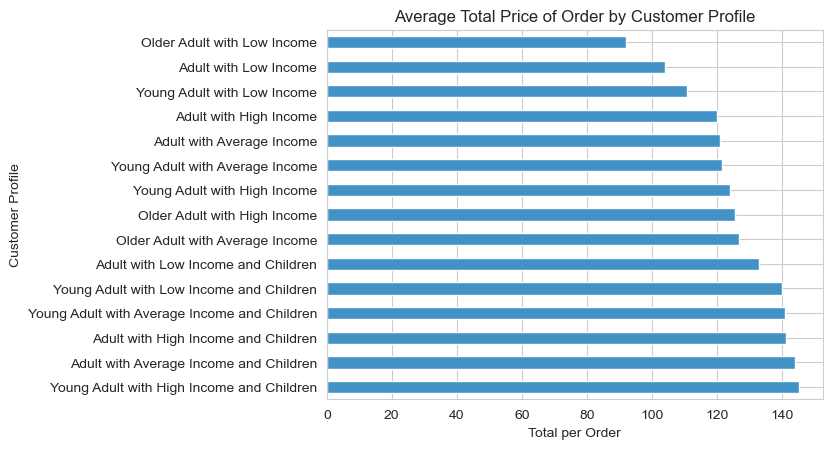

In [212]:
#create bar chart of average spent per order for each customer profilea
bar_avg_total = profile_avg_total['avg_total'].plot.barh(color=['#4292c6'],  title='Average Total Price of Order by Customer Profile', xlabel='Total per Order', ylabel='Customer Profile')

In [213]:
#save bar chart
bar_avg_total.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_customer_profiles_avg_total.png'),bbox_inches="tight")

In [215]:
#generating data on total amount spent per customer
ords_prods_prof['total_spent'] = ords_prods_prof.groupby(['user_id'])['total_price'].transform(np.sum)

C:\Users\EliteMini HX90\AppData\Local\Temp\ipykernel_15168\1927602239.py:2: FutureWarning: The provided callable <function sum at 0x0000027E96A14D60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ords_prods_prof['total_spent'] = ords_prods_prof.groupby(['user_id'])['total_price'].transform(np.sum)


In [216]:
ords_prods_prof['total_spent'].describe()

count    3.096456e+07
mean     6.416891e+04
std      8.573229e+04
min      5.000000e+00
25%      1.513670e+04
50%      3.671680e+04
75%      8.071100e+04
max      1.780678e+06
Name: total_spent, dtype: float64

In [219]:
#getting mean values of total spent per user profile
profile_total_spent = ords_prods_prof.groupby('customer_profile')['total_spent'].mean()
profile_total_spent

customer_profile
Adult with Average Income                        57021.691868
Adult with Average Income and Children           98508.555450
Adult with High Income                           51497.923517
Adult with High Income and Children              91599.172007
Adult with Low Income                            51895.179567
Adult with Low Income and Children               88325.542252
Older Adult with Average Income                  66855.841070
Older Adult with High Income                     65092.838747
Older Adult with Low Income                      48068.275624
Young Adult with Average Income                  56911.866151
Young Adult with Average Income and Children     94493.751427
Young Adult with High Income                     61626.052562
Young Adult with High Income and Children       134845.279020
Young Adult with Low Income                      50509.250725
Young Adult with Low Income and Children         93371.704232
Name: total_spent, dtype: float64

In [221]:
#resetting index to sort values for ease of read

profile_total_spent = profile_total_spent.reset_index().sort_values(['total_spent'],ascending=False).set_index(['customer_profile'])
profile_total_spent

,total_spent
customer_profile,
Young Adult with High Income and Children,134845.279020
Adult with Average Income and Children,98508.555450
Young Adult with Average Income and Children,94493.751427
Young Adult with Low Income and Children,93371.704232
Adult with High Income and Children,91599.172007
Adult with Low Income and Children,88325.542252
Older Adult with Average Income,66855.841070
Older Adult with High Income,65092.838747
Young Adult with High Income,61626.052562


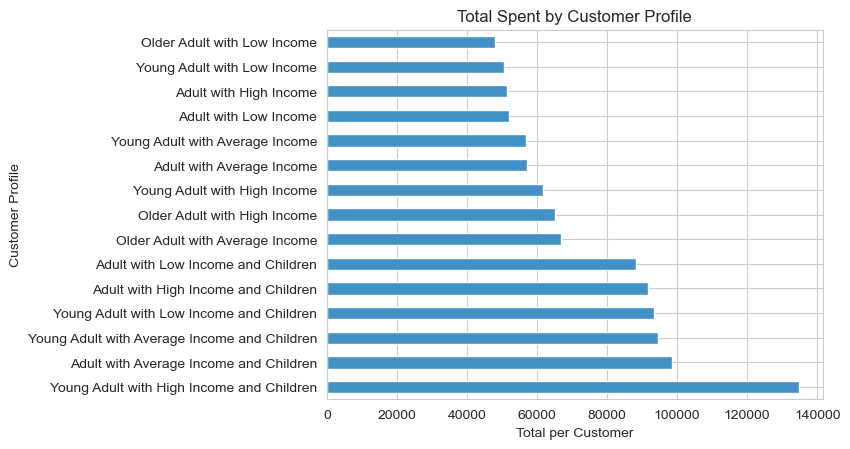

In [222]:
#create bar chart of average total amount spent for each customer profilea
bar_total_spent = profile_total_spent['total_spent'].plot.barh(color=['#4292c6'],  title='Total Spent by Customer Profile', xlabel='Total per Customer', ylabel='Customer Profile')

In [223]:
#save bar chart
bar_total_spent.figure.savefig(os.path.join(path, '04_Analysis','03_Visualizations', 'bar_customer_profiles_total_spent.png'),bbox_inches="tight")

In [226]:
#checking normalized values
total_spent_perc=  profile_total_spent['total_spent'] / profile_total_spent['total_spent'].sum()

total_spent_perc

customer_profile
Young Adult with High Income and Children       0.121414
Adult with Average Income and Children          0.088697
Young Adult with Average Income and Children    0.085082
Young Adult with Low Income and Children        0.084071
Adult with High Income and Children             0.082475
Adult with Low Income and Children              0.079528
Older Adult with Average Income                 0.060197
Older Adult with High Income                    0.058609
Young Adult with High Income                    0.055488
Adult with Average Income                       0.051342
Young Adult with Average Income                 0.051243
Adult with Low Income                           0.046726
Adult with High Income                          0.046369
Young Adult with Low Income                     0.045478
Older Adult with Low Income                     0.043280
Name: total_spent, dtype: float64

***

#06 Final checks and adjustments

***

In [58]:
#check df shape before closing notebook
ords_prods_prof.shape

(30964564, 36)

In [59]:
#rename 'n_dependant' column to 'n_dependent' and 'dependant_group' to 'dependent_group' columns due to spelling mistake only later noticed
ords_prods_prof=ords_prods_prof.rename(columns={'n_dependant':'n_dependent', 'dependant_group':'dependent_group'})

In [214]:
#export dataframe

ords_prods_prof.to_pickle(os.path.join(path,'02_Data','02_Prepared_Data','20231115_ords_prods_with_customer_profile.pkl'))